# Predicting House Prices
### A case study with SciKit Learn and Pandas

This is my linear regression model for predicting housing prices based on a variety of home attributes.

I trained my model by randomly splitting the data into a training set (70%) and test set (30%).

I received my materials from the Metis Intro to Regression Day Bootcamp: https://www.meetup.com/Metis-San-Francisco-Data-Science/ 

Taught by Adam Wearne: https://www.linkedin.com/in/adamwearne/



#### Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

### Importing Raw Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "./data/Ames_Housing_Data.tsv"

In [3]:
df=pd.read_csv(datafile, sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

### Data Cleaning

Since my goal is to predict the SalePrice, I can restrict the number of features I want to work with. This helps me focus on the variables that are most important. 

I will also disregard entries that are "outcasts" or whose patterns aren't applicable to the rest of my set. For example, in this case I am focusing on entries with a living area less than or equal to 4000 sqrt. 

In [5]:
df = df.loc[df['Gr Liv Area']<=4000,:]
df.shape
# This removed 5 entries

(2925, 82)

### Building My Model

82 different features is a lot to work with. I want to narrow down my model to just several features.

In [6]:
new_df= df[['Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 'Bedroom AbvGr','SalePrice']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 7 columns):
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Bedroom AbvGr     2925 non-null int64
SalePrice         2925 non-null int64
dtypes: int64(7)
memory usage: 182.8 KB


### Visualizing the Data

Using seaborn, I can plot my data to see how each feature relates to another. This is especially useful when picking the type of model and seeing what features will impact my predictions the most.

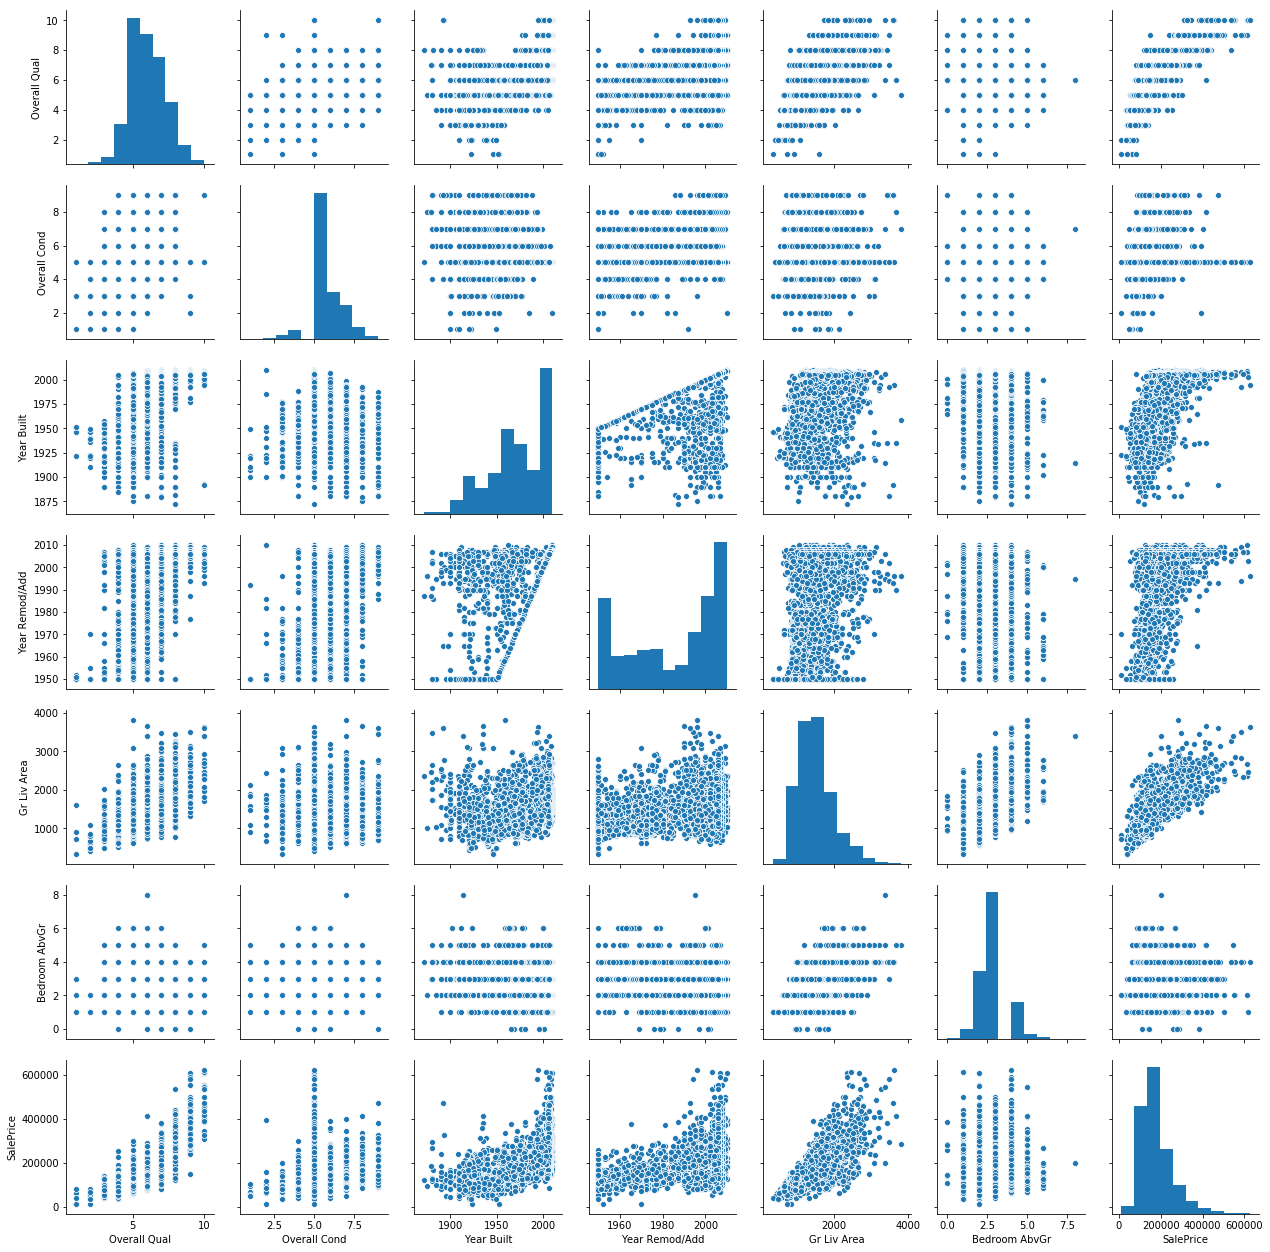

In [7]:
import seaborn as sns
sns.pairplot(new_df)

On the last row of the grid, I can see how each of the housing features affect the SalePrice. Notice the potential correlations like the relation between "Overall Qual" and "Overall Cond".

### Train - Test Splits

Using Sklearn, I can split my data into training and test sets by randomly selecting the entries. 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split the data 70-30 train/test
X = new_df.drop(['SalePrice'], axis=1)
y = new_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [10]:
X_train.shape, X_test.shape

((2047, 6), (878, 6))

In [11]:
X_train.columns

Index(['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Gr Liv Area', 'Bedroom AbvGr'],
      dtype='object')

## Using Linear Regression


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Split the data 70-30 train/test
X = new_df.drop(['SalePrice'], axis=1)
y = new_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 6 columns):
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Bedroom AbvGr     2925 non-null int64
dtypes: int64(6)
memory usage: 240.0 KB


In [14]:
X_train.shape, X_test.shape
# number of features is now six

((2047, 6), (878, 6))

### Feature Engineering
I noticed that some of my features have a "x^2" effect on my sale price. Since I am using a Linear Regression model, I will square these values in order to get a better prediction. I also combine features that I think are related by multiplying their values and creating a new feature from their product. 

In [15]:
X['GLA2'] = X['Gr Liv Area']**2
X['SquaredAreaByBdrm'] = X['GLA2'] * X['Bedroom AbvGr']
X['YearBuiltByYearRemod'] = X['Year Built'] * X['Year Remod/Add']
X['OverallQualByCond'] = X['Overall Qual'] * X['Overall Cond']
X.columns

Index(['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Gr Liv Area', 'Bedroom AbvGr', 'GLA2', 'SquaredAreaByBdrm',
       'YearBuiltByYearRemod', 'OverallQualByCond'],
      dtype='object')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
Overall Qual            2925 non-null int64
Overall Cond            2925 non-null int64
Year Built              2925 non-null int64
Year Remod/Add          2925 non-null int64
Gr Liv Area             2925 non-null int64
Bedroom AbvGr           2925 non-null int64
GLA2                    2925 non-null int64
SquaredAreaByBdrm       2925 non-null int64
YearBuiltByYearRemod    2925 non-null int64
OverallQualByCond       2925 non-null int64
dtypes: int64(10)
memory usage: 331.4 KB


The functions below let us know how well our model is performing based on the amount of error or deviation from the ACTUAL home prices. In an ideal model, the R^2 score is almost equal to 1. 

In [17]:
# Mean Squared Error
def mean_square_error(true, pred):
    return np.mean((pred - true)**2)


In [18]:
# Root Mean Square Error
def root_mean_square_error(true,pred):
    return np.sqrt(mean_square_error(true,pred))


In [19]:
# Mean Absolute Deviation
def mean_absolute_deviation(true,pred):
    return np.mean(np.abs(pred - true))


In [20]:
# R^2 Score
def R2_score(true,pred):
    y_bar_test = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar_test)**2)
    return 1.-SSE/SST


Let's put all of those into one nice function that prints out all of our stats:

In [21]:
def model_stats(true, pred):
    print("MSE:", mean_square_error(true, pred))
    print("MAE:", mean_absolute_deviation(true, pred))
    print("RMSE: ", root_mean_square_error(true,pred))
    print("R2: ", R2_score(true,pred))


Now I will train my model using the features above in combination with some of the original features. The columns with the biggest coefficients (positive or negative) are the most important features while columns with small coefs have little to no effect on my model.

In [22]:
selected_columns = ['Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Gr Liv Area', 'Bedroom AbvGr', 'GLA2', 'SquaredAreaByBdrm', 'OverallQualByCond', 'YearBuiltByYearRemod']

In [23]:
lr_model1 = LinearRegression()
lr_model1.fit(X_train[selected_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
list(zip(X_train[selected_columns].columns,lr_model1.coef_))

[('Overall Qual', 29288.616176522566),
 ('Overall Cond', 13281.041336918368),
 ('Year Built', -9782.895376941538),
 ('Year Remod/Add', -10104.278931845316),
 ('Gr Liv Area', -54.43435820358122),
 ('Bedroom AbvGr', 4046.1366317148713),
 ('GLA2', 0.056744409520274444),
 ('SquaredAreaByBdrm', -0.005431377626114982),
 ('OverallQualByCond', -1521.870043900487),
 ('YearBuiltByYearRemod', 5.218640704453171)]

In [25]:
test_set_pred1 = lr_model1.predict(X_test[selected_columns])

## Plotting Prediction vs Actual

The plot below compares our predicted prices with the actual prices. Ideally, the slope would be equal to 1 as our predictions would make the actual values. We came pretty close!

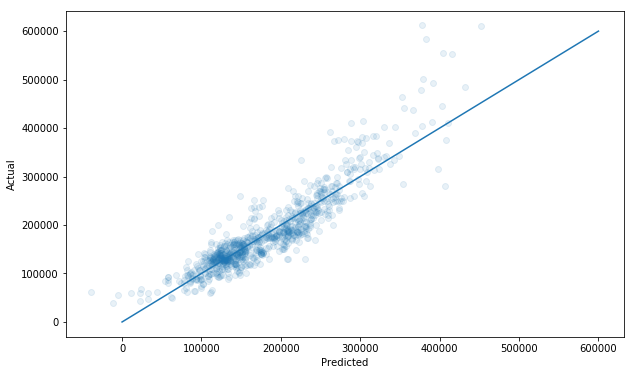

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,600000,1000));
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [27]:
model_stats(y_test, test_set_pred1)

MSE: 1112411866.5146532
MAE: 23423.85160254551
RMSE:  33352.83895734594
R2:  0.8282863681764464
